## Clustering FB

### Import Data

In [1]:
import pandas as pd 

final_df = pd.read_csv('players_rating_potential_database.csv')

In [2]:
final_df_fb = final_df[final_df["Position"] == "Fullbacks"].copy()

In [3]:
final_df_fb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential
1346,Giovanni Di Lorenzo,1993-08-04,SerieA,Napoli,Right,Italy,Fullbacks,3330,0.08,0.05,...,0.00,0.0,2.54,1.22,1.24,49.5,1838,32.0,78.060550,78.060550
1347,Mathías Olivera,1997-10-31,SerieA,Napoli,Left,Uruguay,Fullbacks,2370,0.00,0.08,...,0.00,0.0,3.53,1.56,1.37,53.2,1838,28.0,77.640666,77.640666
1348,Leonardo Spinazzola,1993-03-25,SerieA,Napoli,Right,Italy,Fullbacks,1517,0.06,0.06,...,0.00,0.0,3.68,0.18,0.18,50.0,1838,32.0,77.392940,77.392940
1349,Pasquale Mazzocchi,1995-07-27,SerieA,Napoli,Right,Italy,Fullbacks,702,0.00,0.00,...,0.00,0.0,3.97,0.64,1.03,38.5,1838,30.0,70.355173,70.355173
1350,Alessio Zerbin,1999-03-03,SerieA,Venezia,Right,Italy,Fullbacks,1520,0.06,0.06,...,0.00,0.0,4.09,0.59,0.71,45.5,1558,26.0,71.523994,71.523994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,Leif Davis,2000-01-12,PremierLeague,Ipswich Town,Left,England,Fullbacks,2743,0.03,0.07,...,0.07,0.0,3.71,1.12,0.75,59.6,1797,25.0,76.271701,76.523348
1820,Ben Johnson,2000-01-24,PremierLeague,Ipswich Town,Right,England,Fullbacks,1354,0.07,0.13,...,0.00,0.0,3.79,1.26,1.20,51.4,1797,25.0,74.705850,74.952331
1821,Kyle Walker-Peters,1997-04-13,PremierLeague,Southampton,Right,England,Fullbacks,2918,0.00,0.06,...,0.00,0.0,4.16,0.34,0.65,34.4,1782,28.0,76.622561,76.622561
1822,Ryan Manning,1996-06-14,PremierLeague,Southampton,Left,Republic of Ireland,Fullbacks,1462,0.00,0.06,...,0.00,0.0,4.00,0.92,0.37,71.4,1782,29.0,75.438351,75.438351


In [ ]:
# 2. Define target and input features //
meta_cols = ['Player', 'Position', 'Club', 'Birthdate'] 

fullbacks_features = [
    'Assists', 'Crosses', 'Crosses into Penalty Area',     # Chance creation from wide
    'Progressive Carries', 'Progressive Carrying Distance',# Advancing play on the flanks
    'Carries into Final Third',                            # Offensive contribution
    'Touches (Att 3rd)',                                   # Time spent high up the pitch
    'Pass Completion %', 'Pass Completion % (Long)',       # Passing security under pressure
    'Live-ball Passes', 'Passes Attempted (Long)',         # Ability to vary distribution
    'Progressive Passes', 'Progressive Passing Distance',  # Pushing team upfield
    'Switches',                                            # Switching play across field
    'Through Balls',                                       # Penetrative passes behind defense
    'Blocks', 'Shots Blocked',                             # Defensive contributions
    'Tackles (Def 3rd)', 'Tackles (Att 3rd)',              # Defensive actions at both ends
    'Dribbles Challenged', 'SCA (Live-ball Pass)',         # Defensive duels and shot creation
    'Fouls Committed', 'Fouls Drawn',                      # Defensive discipline and winning fouls
    'Aerials Won',                                         # Aerial presence (defensive/offensive)
    'Errors',                                              # Costly mistakes
    'Ball Recoveries'                                      # Winning back possession
]

In [5]:
df_meta = final_df_fb[meta_cols]

X = final_df_fb[fullbacks_features]

X

,Assists,Crosses,Crosses into Penalty Area,Progressive Carries,Progressive Carrying Distance,Carries into Final Third,Touches (Att 3rd),Pass Completion %,Pass Completion % (Long),Live-ball Passes,...,Shots Blocked,Tackles (Def 3rd),Tackles (Att 3rd),Dribbles Challenged,SCA (Live-ball Pass),Fouls Committed,Fouls Drawn,Aerials Won,Errors,Ball Recoveries
1346,0.05,1.70,0.22,1.35,72.30,0.84,17.49,83.6,57.9,50.41,...,0.16,0.95,0.16,1.76,1.95,1.24,1.38,1.22,0.03,2.54
1347,0.08,0.84,0.15,1.75,95.96,0.87,11.20,85.4,65.3,52.29,...,0.46,1.18,0.27,2.01,1.37,1.06,0.84,1.56,0.04,3.53
1348,0.06,3.86,0.47,4.92,148.56,3.80,20.41,79.3,57.0,44.08,...,0.06,0.36,0.12,1.36,2.25,0.36,0.77,0.18,0.06,3.68
1349,0.00,1.67,0.38,2.56,90.64,1.67,16.54,80.3,42.3,31.79,...,0.26,0.90,0.38,1.92,1.92,1.15,0.64,0.64,0.00,3.97
1350,0.06,4.38,0.59,3.14,73.07,1.54,21.20,65.4,35.3,26.11,...,0.18,1.89,0.53,3.14,1.48,2.13,2.01,0.59,0.06,4.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.07,5.28,0.39,1.71,68.02,1.02,17.29,71.6,37.1,31.83,...,0.26,1.08,0.13,1.57,1.51,0.89,1.02,1.12,0.10,3.71
1820,0.13,2.46,0.13,1.06,38.88,0.80,10.83,71.6,49.0,22.13,...,0.33,1.53,0.20,2.73,0.80,1.79,0.40,1.26,0.07,3.79
1821,0.06,1.57,0.12,3.52,134.88,2.22,16.66,88.2,60.2,46.26,...,0.46,0.68,0.22,1.08,1.23,0.86,1.60,0.34,0.03,4.16
1822,0.06,5.17,0.49,0.86,60.45,0.80,19.76,77.1,44.0,39.03,...,0.68,0.99,0.12,1.60,1.54,1.17,1.97,0.92,0.00,4.00


### PCA

In [6]:
# Now ready for scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components explaining 95% variance: {X_pca.shape[1]}")

Number of components explaining 95% variance: 18


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_metrics(X, k_range):
    inertias = []
    silhouettes = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Plot Inertia (WCSS)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.title('Within-Cluster Sum of Squares')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouettes

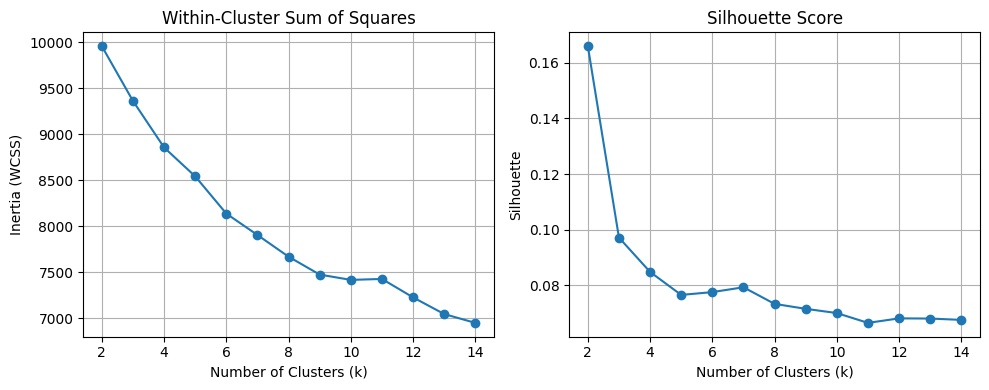

In [8]:
k_range = range(2, 15)
inertias, silhouettes = plot_kmeans_metrics(X_pca, k_range)

In [9]:
final_kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)

X = X.copy()  # Make an explicit copy if X came from slicing
X['cluster'] = cluster_labels

### TSNE & UMAP

In [10]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(X, cluster_labels, df_meta, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=["UMAP-1", "UMAP-2"])
    df_umap['Cluster'] = cluster_labels
    df_umap['Player'] = df_meta['Player'].values
    df_umap['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_umap, x='UMAP-1', y='UMAP-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('UMAP Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_umap


/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


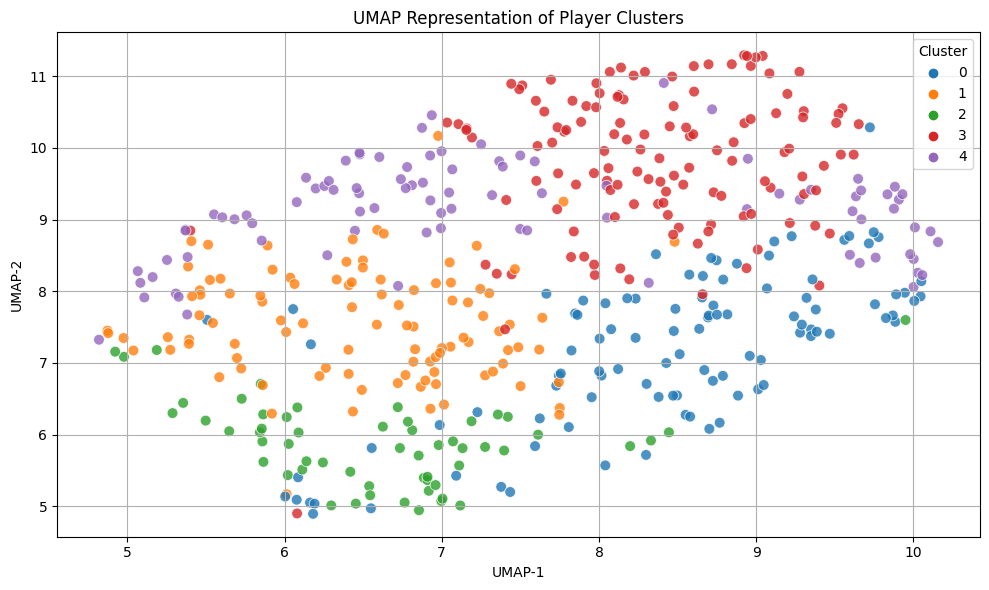

In [11]:
df_umap = plot_umap(X_pca, cluster_labels, df_meta)

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate,
                n_iter=n_iter, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    df_tsne = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
    df_tsne['Cluster'] = cluster_labels
    df_tsne['Player'] = df_meta['Player'].values
    df_tsne['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('t-SNE (Tuned) Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_tsne

/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


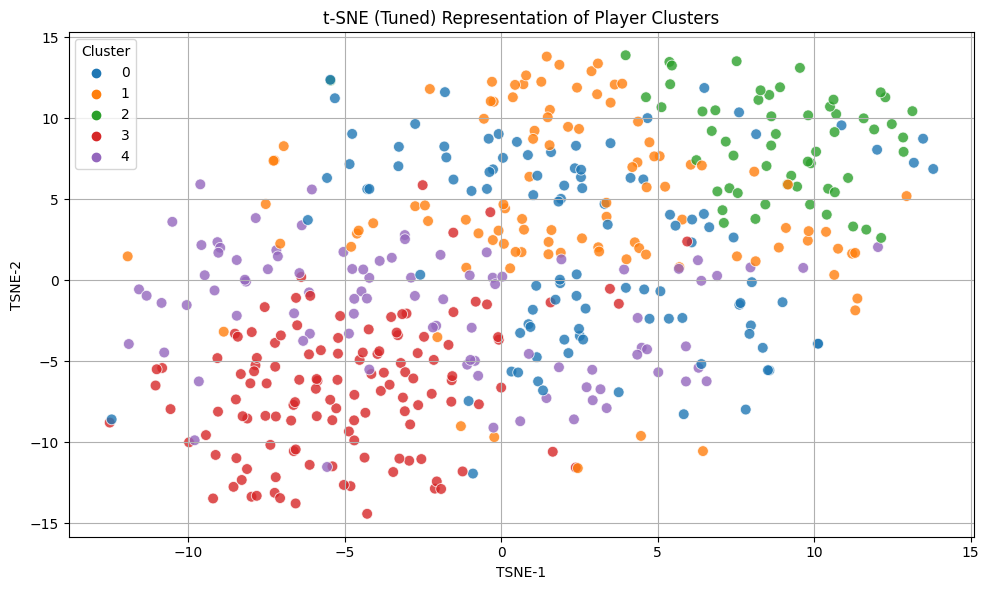

In [13]:
df_tsne = plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=300)

### Playstyle defintion

In [14]:
final_df_fb["Cluster"] = cluster_labels

final_df_fb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
1346,Giovanni Di Lorenzo,1993-08-04,SerieA,Napoli,Right,Italy,Fullbacks,3330,0.08,0.05,...,0.0,2.54,1.22,1.24,49.5,1838,32.0,78.060550,78.060550,0
1347,Mathías Olivera,1997-10-31,SerieA,Napoli,Left,Uruguay,Fullbacks,2370,0.00,0.08,...,0.0,3.53,1.56,1.37,53.2,1838,28.0,77.640666,77.640666,0
1348,Leonardo Spinazzola,1993-03-25,SerieA,Napoli,Right,Italy,Fullbacks,1517,0.06,0.06,...,0.0,3.68,0.18,0.18,50.0,1838,32.0,77.392940,77.392940,1
1349,Pasquale Mazzocchi,1995-07-27,SerieA,Napoli,Right,Italy,Fullbacks,702,0.00,0.00,...,0.0,3.97,0.64,1.03,38.5,1838,30.0,70.355173,70.355173,1
1350,Alessio Zerbin,1999-03-03,SerieA,Venezia,Right,Italy,Fullbacks,1520,0.06,0.06,...,0.0,4.09,0.59,0.71,45.5,1558,26.0,71.523994,71.523994,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,Leif Davis,2000-01-12,PremierLeague,Ipswich Town,Left,England,Fullbacks,2743,0.03,0.07,...,0.0,3.71,1.12,0.75,59.6,1797,25.0,76.271701,76.523348,4
1820,Ben Johnson,2000-01-24,PremierLeague,Ipswich Town,Right,England,Fullbacks,1354,0.07,0.13,...,0.0,3.79,1.26,1.20,51.4,1797,25.0,74.705850,74.952331,3
1821,Kyle Walker-Peters,1997-04-13,PremierLeague,Southampton,Right,England,Fullbacks,2918,0.00,0.06,...,0.0,4.16,0.34,0.65,34.4,1782,28.0,76.622561,76.622561,0
1822,Ryan Manning,1996-06-14,PremierLeague,Southampton,Left,Republic of Ireland,Fullbacks,1462,0.00,0.06,...,0.0,4.00,0.92,0.37,71.4,1782,29.0,75.438351,75.438351,3


In [15]:
cluster_summary = X.copy()
summary_stats = cluster_summary.groupby('cluster').agg(['mean'])

In [16]:
mean_per_cluster = summary_stats.xs('mean', axis=1, level=1)
std_across_clusters = mean_per_cluster.std(axis=0)

summary_stats

,Assists,Crosses,Crosses into Penalty Area,Progressive Carries,Progressive Carrying Distance,Carries into Final Third,Touches (Att 3rd),Pass Completion %,Pass Completion % (Long),Live-ball Passes,...,Shots Blocked,Tackles (Def 3rd),Tackles (Att 3rd),Dribbles Challenged,SCA (Live-ball Pass),Fouls Committed,Fouls Drawn,Aerials Won,Errors,Ball Recoveries
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.063627,2.284608,0.335098,1.898725,92.919216,1.410490,17.180294,82.079412,56.276471,49.216275,...,0.314902,1.259020,0.279412,2.225294,1.606961,1.109412,0.983235,1.136176,0.057059,4.433922
1,0.154851,4.350990,0.624158,2.904752,98.174455,1.932673,21.019604,76.040594,47.604950,40.822772,...,0.215941,0.870693,0.223663,1.609406,2.001782,0.940198,1.051188,0.808911,0.039703,4.261683
2,0.158421,4.637018,0.662632,2.735789,119.784912,2.117895,24.306140,79.545614,54.978947,55.875614,...,0.236316,1.063158,0.308772,2.148421,2.493684,1.018596,0.892281,0.880000,0.053158,5.130351
3,0.060315,2.212756,0.342677,1.447323,62.997638,1.044094,13.588031,76.196063,46.340157,36.100472,...,0.370630,0.981260,0.170945,1.600630,1.213228,1.071417,0.937402,1.437559,0.035669,3.494961
4,0.091099,3.711099,0.545165,1.761758,66.564505,1.203626,16.035824,71.076923,41.115385,35.018681,...,0.280659,1.460549,0.285824,2.484176,1.570110,1.154615,1.017253,1.003407,0.054615,4.139231


In [17]:
summary_stats.to_excel(('cluster_summary_fb_vf.xlsx'), index=True)

Top players per Cluster

In [18]:
def top_players_per_cluster(df, rating_col='Rating', cluster_col='Cluster', top_n=10):
    top_players = (
        df.sort_values(by=[cluster_col, rating_col], ascending=[True, False])
          .groupby(cluster_col)
          .head(top_n)
          .reset_index(drop=True)
    )
    return top_players[['Player', 'Position', 'Club', cluster_col, rating_col]]


In [19]:
top_10_per_cluster = top_players_per_cluster(final_df_fb, rating_col='Rating', cluster_col='Cluster', top_n=10)
top_10_per_cluster

,Player,Position,Club,Cluster,Rating
0,Joško Gvardiol,Fullbacks,Manchester City,0,81.825546
1,Jules Koundé,Fullbacks,Barcelona,0,81.093266
2,Jurriën Timber,Fullbacks,Arsenal,0,80.316411
3,Ben White,Fullbacks,Arsenal,0,80.196412
4,Gerard Martín,Fullbacks,Barcelona,0,79.967241
5,Fran Garcia,Fullbacks,Real Madrid,0,79.885539
6,Stefan Posch,Fullbacks,Atalanta,0,79.658120
7,Lewis Hall,Fullbacks,Newcastle United,0,79.641564
8,Malo Gusto,Fullbacks,Chelsea,0,79.452282
9,Lucas Vázquez,Fullbacks,Real Madrid,0,79.384636


In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(top_10_per_cluster)

                    Player   Position                 Club  Cluster     Rating
0           Joško Gvardiol  Fullbacks      Manchester City        0  81.825546
1             Jules Koundé  Fullbacks            Barcelona        0  81.093266
2           Jurriën Timber  Fullbacks              Arsenal        0  80.316411
3                Ben White  Fullbacks              Arsenal        0  80.196412
4            Gerard Martín  Fullbacks            Barcelona        0  79.967241
5              Fran Garcia  Fullbacks          Real Madrid        0  79.885539
6             Stefan Posch  Fullbacks             Atalanta        0  79.658120
7               Lewis Hall  Fullbacks     Newcastle United        0  79.641564
8               Malo Gusto  Fullbacks              Chelsea        0  79.452282
9            Lucas Vázquez  Fullbacks          Real Madrid        0  79.384636
10         Nicola Zalewski  Fullbacks       Internazionale        1  80.427195
11         Alejandro Balde  Fullbacks            Bar

### Spider Charts

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === STEP 0 — Inputs ===
features =  [                              
    'npxG + xAG', 'Assists', 
    'Crosses',                                              # Chance creation from wide
    'Progressive Carrying Distance',                        # Advancing play on the flanks
    'Carries into Final Third',                             # Offensive contribution
    'Touches (Att 3rd)',                                    # Time spent high up the pitch
    'Pass Completion %',                                    # Passing security under pressure
    'Tackles (Def 3rd)',                                    # Defensive actions at both ends
    'Dribbles Challenged', 'SCA (Live-ball Pass)',          # Defensive duels and shot creation
    'Ball Recoveries'                                       # Winning back possession
]

# Define custom cluster labels for each cluster index
cluster_names = {
    0: "Inverted Facilitators",
    1: "Dynamic Engines",
    2: "Offensive Catalysts",
    3: "Robust Wide Stoppers",
    4: "Two-Way Modernisers"
}


# Assuming your DataFrame with 300 players is named `df_players` and has a 'Cluster' column
cluster_sizes = final_df_fb.groupby("Cluster").size()

# Build the cluster_names dictionary
cluster_names = {
    cluster: (cluster_names[cluster], size)
    for cluster, size in cluster_sizes.items()
}

# Optional: display the result
cluster_names

{0: ('Inverted Facilitators', 102),
 1: ('Dynamic Engines', 101),
 2: ('Offensive Catalysts', 57),
 3: ('Robust Wide Stoppers', 127),
 4: ('Two-Way Modernisers', 91)}

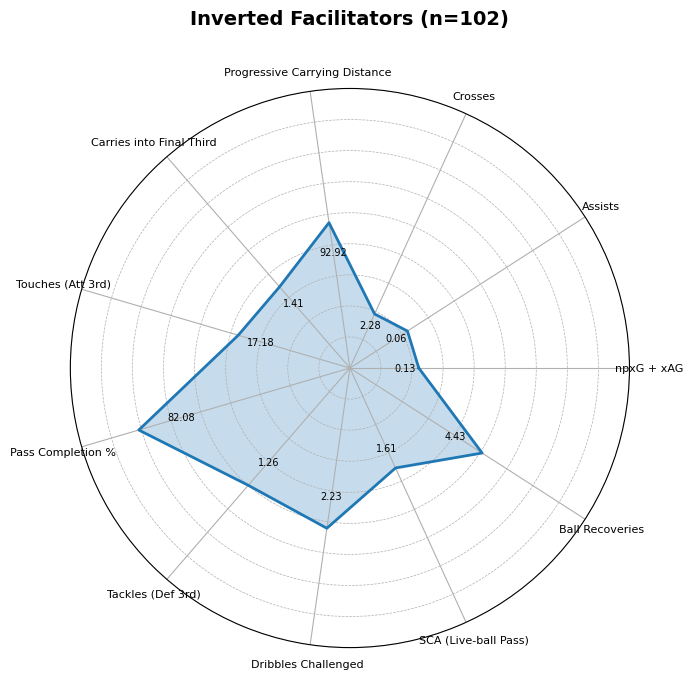

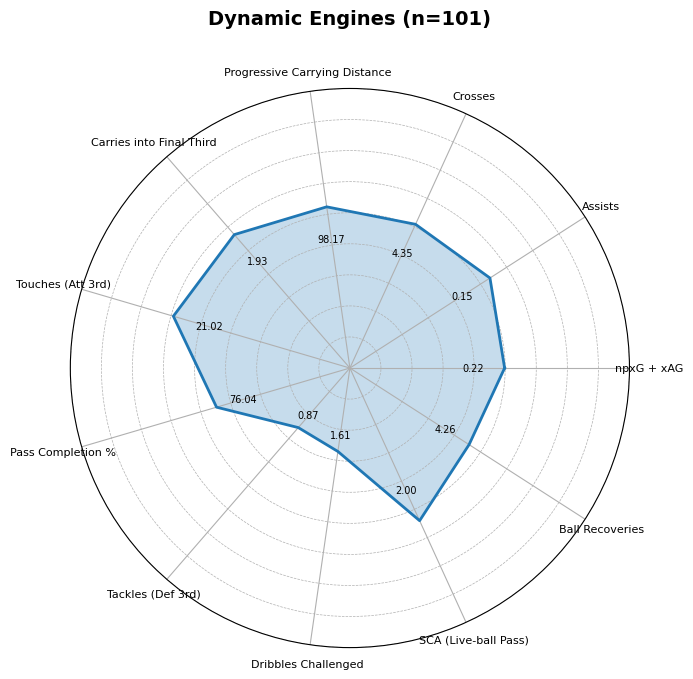

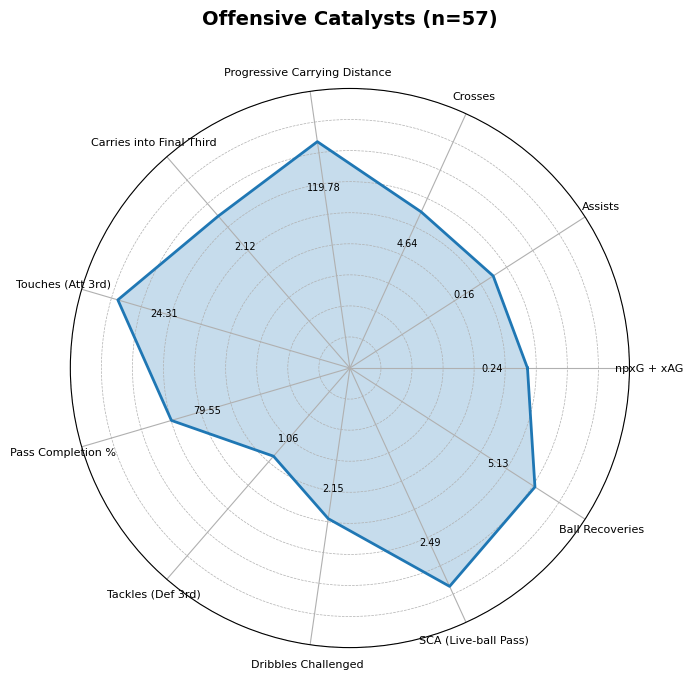

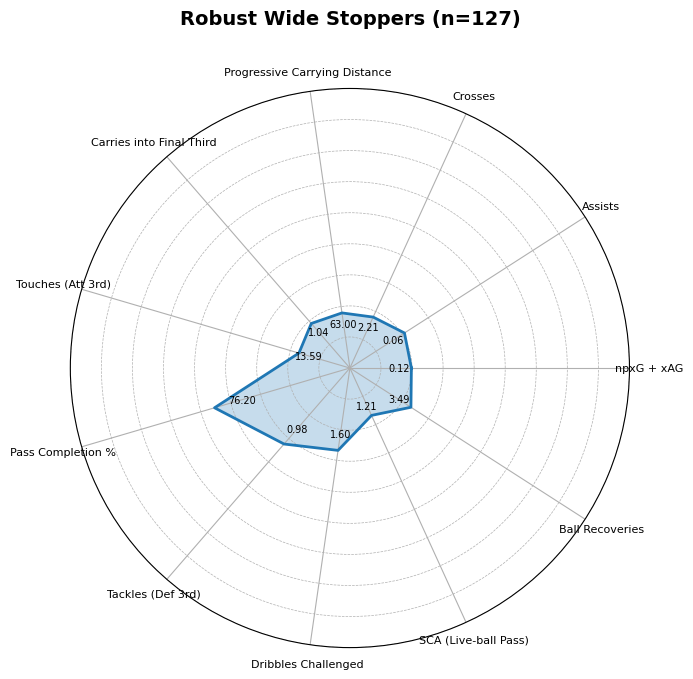

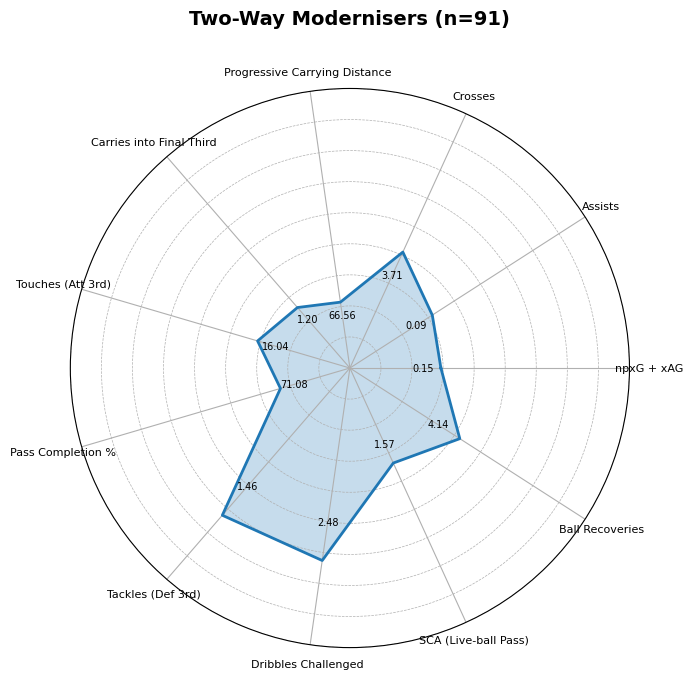

In [22]:
# === STEP 1 — Compute raw cluster means ===
raw_means = final_df_fb.groupby("Cluster")[features].mean()

# === STEP 2 — Compute 5th and 95th percentiles for full AM/W pool ===
lower_bounds = final_df_fb[features].quantile(0.05)
upper_bounds = final_df_fb[features].quantile(0.95)

# === STEP 3 — Normalize raw cluster means to build scaled radar profiles ===
range_vals = (upper_bounds - lower_bounds).replace(0, 1)
scaled_means = (raw_means - lower_bounds) / range_vals
scaled_means = scaled_means.clip(0, 1)

# === STEP 4 — Radar Chart Function ===
def create_annotated_radar(scaled_row, raw_row, cluster_id, title, n_lines=10):
    labels = scaled_row.index
    stats = scaled_row.values
    raw_stats = raw_row.values

    # Close the loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    raw_stats = np.concatenate((raw_stats, [raw_stats[0]]))
    angles += [angles[0]]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    # Radar plot
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)

    # Inner gridlines (no % labels)
    ax.set_yticks(np.linspace(0, 1, n_lines))
    ax.set_yticklabels([])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)

    # Annotate raw values near inner vertices (85% of scaled radius)
    for angle, scaled_val, raw_val in zip(angles[:-1], stats[:-1], raw_stats[:-1]):
        radius = scaled_val * 0.8
        ax.text(
            angle, radius, f"{raw_val:.2f}",
            ha='center', va='center', fontsize=7, color='black'
        )


    # Title with cluster name and size
    cluster_label, size = cluster_names[cluster_id]
    ax.set_title(f"{cluster_label} (n={size})", size=14, weight='bold', y=1.1)

    plt.tight_layout()
    return fig


# === STEP 5 — Plot or Export Charts ===
for cluster_id in raw_means.index:
    fig = create_annotated_radar(
        scaled_row=scaled_means.loc[cluster_id],
        raw_row=raw_means.loc[cluster_id],
        cluster_id=cluster_id,
        title=cluster_names[cluster_id][0]
    )
    plt.show()


### Find similar players Cosine Similarity

In [24]:
from sklearn.preprocessing import StandardScaler

# Step 1: Extract numerical features
feature_cols = [
    'Assists', 'Crosses', 'Crosses into Penalty Area',     # Chance creation from wide
    'Progressive Carries', 'Progressive Carrying Distance',# Advancing play on the flanks
    'Carries into Final Third',                            # Offensive contribution
    'Touches (Att 3rd)',                                   # Time spent high up the pitch
    'Pass Completion %', 'Pass Completion % (Long)',       # Passing security under pressure
    'Live-ball Passes', 'Passes Attempted (Long)',         # Ability to vary distribution
    'Progressive Passes', 'Progressive Passing Distance',  # Pushing team upfield
    'Switches',                                            # Switching play across field
    'Through Balls',                                       # Penetrative passes behind defense
    'Blocks', 'Shots Blocked',                             # Defensive contributions
    'Tackles (Def 3rd)', 'Tackles (Att 3rd)',              # Defensive actions at both ends
    'Dribbles Challenged', 'SCA (Live-ball Pass)',         # Defensive duels and shot creation
    'Fouls Committed', 'Fouls Drawn',                      # Defensive discipline and winning fouls
    'Aerials Won',                                         # Aerial presence (defensive/offensive)
    'Errors',                                              # Costly mistakes
    'Ball Recoveries'                                      # Winning back possession
]

# Step 2: Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_fb[feature_cols])

# Step 3: Create a scaled DataFrame to use
df_scaled = final_df_fb.copy()
df_scaled[feature_cols] = X_scaled

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity(player1, player2, df, feature_cols):
    vec1 = df.loc[df['Player'] == player1, feature_cols].values.flatten()
    vec2 = df.loc[df['Player'] == player2, feature_cols].values.flatten()

    similarity = cosine_similarity([vec1], [vec2])[0, 0]
    return round(similarity * 100, 2)  # Percent similarity

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_pca_cluster_similarity(player1, player2, df, df_pca, cluster_labels, boost=1.1):
    idx1 = df[df['Player'] == player1].index[0]
    idx2 = df[df['Player'] == player2].index[0]

    # Get row positions, not index values
    pos1 = df.index.get_loc(idx1)
    pos2 = df.index.get_loc(idx2)

    vec1 = df_pca[pos1]
    vec2 = df_pca[pos2]

    sim = cosine_similarity([vec1], [vec2])[0, 0] * 100
    if cluster_labels.iloc[pos1] == cluster_labels.iloc[pos2]:
        sim *= boost

    return round(min(sim, 100), 2)


In [27]:
def most_similar_players_pca_cluster(player_name, df, df_pca, cluster_labels, top_n=10, boost=1.1):
    player_index = {player: idx for idx, player in enumerate(df['Player'])}
    base_idx = player_index[player_name]
    base_vec = df_pca[base_idx]

    similarities = []
    for i, other_name in enumerate(df['Player']):
        if other_name == player_name:
            continue
        other_vec = df_pca[i]
        sim = cosine_similarity([base_vec], [other_vec])[0, 0] * 100
        if cluster_labels[i] == cluster_labels[base_idx]:
            sim *= boost
        similarities.append((other_name, round(min(sim, 100), 2)))

    return sorted(similarities, key=lambda x: -x[1])[:top_n]


In [28]:
most_similar_players_pca_cluster("Achraf Hakimi", final_df_fb, X_pca, cluster_labels)

[('Mauro Júnior', 91.51),
 ('Alphonso Davies', 87.97),
 ('Guilherme Arana', 84.85),
 ('Konrad Laimer', 84.71),
 ('Andrea Cambiaso', 83.59),
 ('Álex Grimaldo', 82.17),
 ('Nuno Mendes', 81.4),
 ('Richy Ledezma', 80.78),
 ('Yan Couto', 80.32),
 ('Matheus Nunes', 80.14)]

In [30]:
final_df_fb_reset = final_df_fb.reset_index(drop=True)
cluster_labels_reset = final_df_fb["Cluster"]  # Still aligned

compute_pca_cluster_similarity("Achraf Hakimi", "Achraf Hakimi", final_df_fb_reset, X_pca, cluster_labels_reset)

100

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def compare_two_players_radar_pca(player1_name, player2_name, df, features, df_pca, cluster_labels, boost=1.1):
    # Step 1: Create index mapping once
    player_index = {player: idx for idx, player in enumerate(df['Player'])}

    # Step 2: Compute global scaling bounds
    lower_bounds = df[features].quantile(0.02)
    upper_bounds = df[features].quantile(0.98)
    range_vals = (upper_bounds - lower_bounds).replace(0, 1)

    # Step 3: Extract player stats
    p1_row = df[df["Player"] == player1_name].iloc[0]
    p2_row = df[df["Player"] == player2_name].iloc[0]
    p1_raw = p1_row[features]
    p2_raw = p2_row[features]

    # Step 4: Normalize
    p1_scaled = ((p1_raw - lower_bounds) / range_vals).clip(0, 1)
    p2_scaled = ((p2_raw - lower_bounds) / range_vals).clip(0, 1)

    # Step 5: PCA-based similarity score
    similarity_score = compute_pca_cluster_similarity(player1_name, player2_name, final_df_fb, df_pca, cluster_labels)

    # Step 6: Radar chart setup
    labels = features
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]

    p1_scaled = np.append(p1_scaled.values, p1_scaled.values[0])
    p2_scaled = np.append(p2_scaled.values, p2_scaled.values[0])
    p1_raw = np.append(p1_raw.values, p1_raw.values[0])
    p2_raw = np.append(p2_raw.values, p2_raw.values[0])

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Step 7: Plot both players
    ax.plot(angles, p1_scaled, color="green", linewidth=2, label=player1_name)
    ax.fill(angles, p1_scaled, color="green", alpha=0.25)
    ax.plot(angles, p2_scaled, color="red", linewidth=2, label=player2_name)
    ax.fill(angles, p2_scaled, color="red", alpha=0.25)

    ax.set_yticks(np.linspace(0, 1, 10))
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Annotate raw stats
    for angle, val1, val2, scale1, scale2 in zip(angles[:-1], p1_raw[:-1], p2_raw[:-1], p1_scaled[:-1], p2_scaled[:-1]):
        ax.text(angle, scale1 * 0.9, f"{val1:.2f}", ha='center', va='center', fontsize=7, color='green')
        ax.text(angle, scale2 * 0.9, f"{val2:.2f}", ha='center', va='center', fontsize=7, color='red')

    # Title and similarity
    ax.set_title(f"{player1_name} vs {player2_name}", size=14, weight='bold', y=1.07)
    ax.text(0.5, 1.15, f"Similarity score (PCA): {similarity_score:.2f}", transform=ax.transAxes,
        ha='center', va='center', fontsize=10, color='gray')


    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=8)
    plt.tight_layout()
    plt.show()


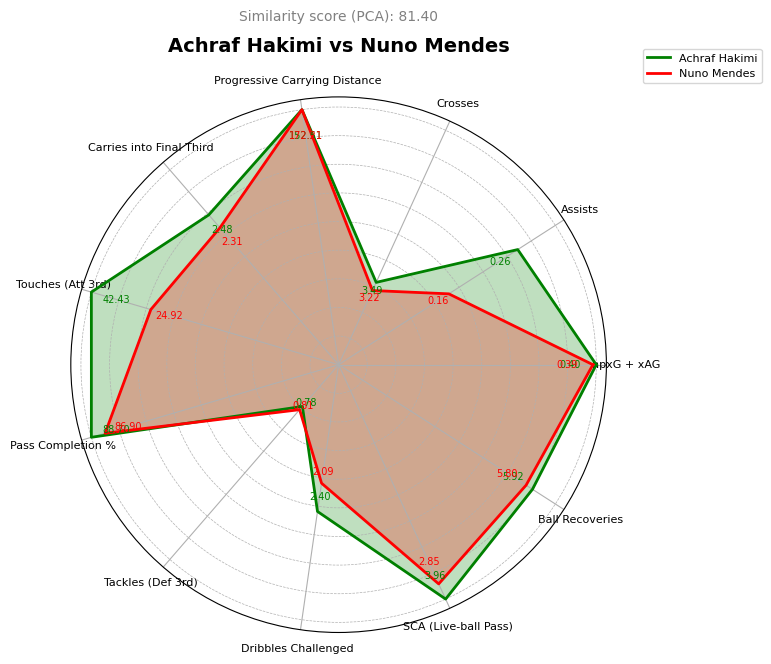

In [33]:
compare_two_players_radar_pca(
    player1_name="Achraf Hakimi",
    player2_name="Nuno Mendes",
    df=final_df_fb,
    features=features,
    df_pca=X_pca,
    cluster_labels=final_df_fb["Cluster"]
)

### Final Naming + Export

In [34]:
final_df_fb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
1346,Giovanni Di Lorenzo,1993-08-04,SerieA,Napoli,Right,Italy,Fullbacks,3330,0.08,0.05,...,0.0,2.54,1.22,1.24,49.5,1838,32.0,78.060550,78.060550,0
1347,Mathías Olivera,1997-10-31,SerieA,Napoli,Left,Uruguay,Fullbacks,2370,0.00,0.08,...,0.0,3.53,1.56,1.37,53.2,1838,28.0,77.640666,77.640666,0
1348,Leonardo Spinazzola,1993-03-25,SerieA,Napoli,Right,Italy,Fullbacks,1517,0.06,0.06,...,0.0,3.68,0.18,0.18,50.0,1838,32.0,77.392940,77.392940,1
1349,Pasquale Mazzocchi,1995-07-27,SerieA,Napoli,Right,Italy,Fullbacks,702,0.00,0.00,...,0.0,3.97,0.64,1.03,38.5,1838,30.0,70.355173,70.355173,1
1350,Alessio Zerbin,1999-03-03,SerieA,Venezia,Right,Italy,Fullbacks,1520,0.06,0.06,...,0.0,4.09,0.59,0.71,45.5,1558,26.0,71.523994,71.523994,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,Leif Davis,2000-01-12,PremierLeague,Ipswich Town,Left,England,Fullbacks,2743,0.03,0.07,...,0.0,3.71,1.12,0.75,59.6,1797,25.0,76.271701,76.523348,4
1820,Ben Johnson,2000-01-24,PremierLeague,Ipswich Town,Right,England,Fullbacks,1354,0.07,0.13,...,0.0,3.79,1.26,1.20,51.4,1797,25.0,74.705850,74.952331,3
1821,Kyle Walker-Peters,1997-04-13,PremierLeague,Southampton,Right,England,Fullbacks,2918,0.00,0.06,...,0.0,4.16,0.34,0.65,34.4,1782,28.0,76.622561,76.622561,0
1822,Ryan Manning,1996-06-14,PremierLeague,Southampton,Left,Republic of Ireland,Fullbacks,1462,0.00,0.06,...,0.0,4.00,0.92,0.37,71.4,1782,29.0,75.438351,75.438351,3


In [35]:
cluster_labels = {k: v[0] for k, v in cluster_names.items()}

final_df_fb["Cluster Name"] = final_df_fb["Cluster"].map(cluster_labels)

In [36]:
final_df_fb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name
1346,Giovanni Di Lorenzo,1993-08-04,SerieA,Napoli,Right,Italy,Fullbacks,3330,0.08,0.05,...,2.54,1.22,1.24,49.5,1838,32.0,78.060550,78.060550,0,Inverted Facilitators
1347,Mathías Olivera,1997-10-31,SerieA,Napoli,Left,Uruguay,Fullbacks,2370,0.00,0.08,...,3.53,1.56,1.37,53.2,1838,28.0,77.640666,77.640666,0,Inverted Facilitators
1348,Leonardo Spinazzola,1993-03-25,SerieA,Napoli,Right,Italy,Fullbacks,1517,0.06,0.06,...,3.68,0.18,0.18,50.0,1838,32.0,77.392940,77.392940,1,Dynamic Engines
1349,Pasquale Mazzocchi,1995-07-27,SerieA,Napoli,Right,Italy,Fullbacks,702,0.00,0.00,...,3.97,0.64,1.03,38.5,1838,30.0,70.355173,70.355173,1,Dynamic Engines
1350,Alessio Zerbin,1999-03-03,SerieA,Venezia,Right,Italy,Fullbacks,1520,0.06,0.06,...,4.09,0.59,0.71,45.5,1558,26.0,71.523994,71.523994,4,Two-Way Modernisers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,Leif Davis,2000-01-12,PremierLeague,Ipswich Town,Left,England,Fullbacks,2743,0.03,0.07,...,3.71,1.12,0.75,59.6,1797,25.0,76.271701,76.523348,4,Two-Way Modernisers
1820,Ben Johnson,2000-01-24,PremierLeague,Ipswich Town,Right,England,Fullbacks,1354,0.07,0.13,...,3.79,1.26,1.20,51.4,1797,25.0,74.705850,74.952331,3,Robust Wide Stoppers
1821,Kyle Walker-Peters,1997-04-13,PremierLeague,Southampton,Right,England,Fullbacks,2918,0.00,0.06,...,4.16,0.34,0.65,34.4,1782,28.0,76.622561,76.622561,0,Inverted Facilitators
1822,Ryan Manning,1996-06-14,PremierLeague,Southampton,Left,Republic of Ireland,Fullbacks,1462,0.00,0.06,...,4.00,0.92,0.37,71.4,1782,29.0,75.438351,75.438351,3,Robust Wide Stoppers


In [38]:
# Keep only the most-played entry per player
final_df_cb = final_df_fb.sort_values("Minutes", ascending=False).drop_duplicates(subset="Player")

In [39]:
final_df_cb.to_csv("final_df_fb_with_clusters.csv", index=False)